Cél: a rendszerben tárolt betegadatokból megjeleníteni az ID-t és a diagnózist, a diagnózisokat kategóriákba rendezni, gyakoriságot megszámolni

beolvasni az adatbázist

az alábbi oszlopokat megjeleníteni: 1., 2., 3. oszlop, elnevezni az oszlopokat

diagnózisok kategóriákba rendezése: dictionary készítése

dictionary kategóriák megszámolása (pie chart?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
matrix=pd.read_csv('../../data/microLab.csv', index_col=0)
matrix

,patientunitstayid,culturetakenoffset,culturesite,organism,antibiotic,sensitivitylevel
microlabid,,,,,,
549559,983524,-688,"Blood, Venipuncture",gram positive rods,NaN,NaN
549555,983524,-5481,Stool,no growth,NaN,NaN
549565,983524,324,Stool,no growth,NaN,NaN
549562,983524,-686,"Blood, Central Line",gram negative rods,NaN,NaN
549564,983524,-681,"Blood, Central Line",gram positive cocci,NaN,NaN
...,...,...,...,...,...,...
1617032,3160582,411,Other,mixed flora,NaN,NaN
1617031,3160582,-521,"Blood, Venipuncture",no growth,NaN,NaN
1617033,3160582,411,Other,Candida albicans,NaN,NaN


In [31]:
culturesites=matrix['culturesite']
culturesites

microlabid
549559           Blood, Venipuncture
549555                         Stool
549565                         Stool
549562           Blood, Central Line
549564           Blood, Central Line
                     ...            
1617032                        Other
1617031          Blood, Venipuncture
1617033                        Other
1617030          Blood, Venipuncture
1627296    Sputum, Tracheal Specimen
Name: culturesite, Length: 16996, dtype: object

In [9]:
culturesites.unique()

array(['Blood, Venipuncture', 'Stool', 'Blood, Central Line',
       'Urine, Voided Specimen', 'Sputum, Tracheal Specimen',
       'Nasopharynx', 'Urine, Catheter Specimen', 'Sputum, Expectorated',
       'Bronchial Lavage', 'CSF', 'Other', 'Wound, Drainage Fluid',
       'Wound, Decubitus', 'Abscess', 'Pleural Fluid', 'Peritoneal Fluid',
       'Wound, Surgical', 'Bile', 'Rectal Swab', 'Skin'], dtype=object)

In [16]:
culturesites=culturesites.apply(lambda culturesite: True if 'Blood' in culturesite else False)

In [17]:
bool_mask=culturesites==True

In [20]:
culturesites[bool_mask]

microlabid
549559     True
549562     True
549564     True
549556     True
549557     True
           ... 
1599487    True
1621776    True
1621777    True
1617031    True
1617030    True
Name: culturesite, Length: 3431, dtype: bool

len(culturesites[bool_mask])

In [25]:
trues=len(culturesites[bool_mask])
falses=len(culturesites)-trues

In [26]:
falses

13565

In [27]:
trues

3431

In [28]:
len(culturesites)

16996

In [32]:
culturesites.unique()

array(['Blood, Venipuncture', 'Stool', 'Blood, Central Line',
       'Urine, Voided Specimen', 'Sputum, Tracheal Specimen',
       'Nasopharynx', 'Urine, Catheter Specimen', 'Sputum, Expectorated',
       'Bronchial Lavage', 'CSF', 'Other', 'Wound, Drainage Fluid',
       'Wound, Decubitus', 'Abscess', 'Pleural Fluid', 'Peritoneal Fluid',
       'Wound, Surgical', 'Bile', 'Rectal Swab', 'Skin'], dtype=object)

In [38]:
culturesite_numbers=culturesites.value_counts(sort=False)
culturesite_numbers

Peritoneal Fluid              172
Nasopharynx                  1325
Wound, Decubitus              313
Pleural Fluid                 153
Urine, Voided Specimen       1051
Sputum, Expectorated         2013
Blood, Venipuncture          3352
Wound, Surgical                40
Sputum, Tracheal Specimen    3191
Urine, Catheter Specimen     2132
Bronchial Lavage              569
Rectal Swab                   194
Abscess                        80
Other                        1893
Bile                            1
Stool                         239
Skin                           24
Wound, Drainage Fluid          78
CSF                            97
Blood, Central Line            79
Name: culturesite, dtype: int64

([<matplotlib.patches.Wedge at 0x7f99e5ea7c70>,
 [Text(1.0994441093940062, 0.03496641701433821, ''),
  Text(1.0480680666583566, 0.33399599945360864, ''),
  Text(0.9008079974462405, 0.6313041673685467, ''),
  Text(0.8431569211242506, 0.7064604775642261, ''),
  Text(0.6664337406635688, 0.8751377430468664, ''),
  Text(0.0928101300562767, 1.0960776796189844, ''),
  Text(-0.8665669663133406, 0.677540916029795, ''),
  Text(-1.0992633667003975, 0.0402498525526209, ''),
  Text(-0.9316129244880889, -0.5848908948913041, ''),
  Text(-0.028869199458409732, -1.0996211026179112, ''),
  Text(0.5011279372620644, -0.9792194802471347, ''),
  Text(0.6337993243751813, -0.8990541788021253, ''),
  Text(0.6785015448887851, -0.865815022729181, ''),
  Text(0.9426838240086836, -0.5668749491310808, ''),
  Text(1.0799310430966251, -0.20916247788796896, ''),
  Text(1.088144448988328, -0.16106414292414042, ''),
  Text(1.0946857438227855, -0.1079959363640817, ''),
  Text(1.096527217856756, -0.08733876859289064, ''),

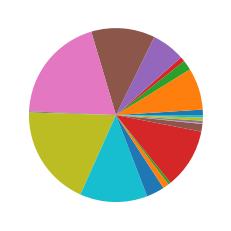

In [40]:
plt.pie(culturesite_numbers)

In [45]:
trial=pd.Series(culturesites.unique())
trial

0           Blood, Venipuncture
1                         Stool
2           Blood, Central Line
3        Urine, Voided Specimen
4     Sputum, Tracheal Specimen
5                   Nasopharynx
6      Urine, Catheter Specimen
7          Sputum, Expectorated
8              Bronchial Lavage
9                           CSF
10                        Other
11        Wound, Drainage Fluid
12             Wound, Decubitus
13                      Abscess
14                Pleural Fluid
15             Peritoneal Fluid
16              Wound, Surgical
17                         Bile
18                  Rectal Swab
19                         Skin
dtype: object

In [46]:
type(trial)

pandas.core.series.Series

In [55]:
bogre=trial.apply(lambda element: matrix.loc[matrix['culturesite']==element])

In [53]:
bogre

0                 patientunitstayid  culturetakenoff...
1                 patientunitstayid  culturetakenoff...
2                 patientunitstayid  culturetakenoff...
3                 patientunitstayid  culturetakenoff...
4                 patientunitstayid  culturetakenoff...
5                 patientunitstayid  culturetakenoff...
6                 patientunitstayid  culturetakenoff...
7                 patientunitstayid  culturetakenoff...
8                 patientunitstayid  culturetakenoff...
9                 patientunitstayid  culturetakenoff...
10                patientunitstayid  culturetakenoff...
11                patientunitstayid  culturetakenoff...
12                patientunitstayid  culturetakenoff...
13                patientunitstayid  culturetakenoff...
14                patientunitstayid  culturetakenoff...
15                patientunitstayid  culturetakenoff...
16                patientunitstayid  culturetakenoff...
17                patientunitstayid  culturetake

In [54]:
bogre[5]

,patientunitstayid,culturetakenoffset,culturesite,organism,antibiotic,sensitivitylevel
microlabid,,,,,,
551409,990355,34,Nasopharynx,no growth,NaN,NaN
837314,2588551,615,Nasopharynx,no growth,NaN,NaN
1570107,3034199,21,Nasopharynx,Other,NaN,NaN
1571129,3035002,112,Nasopharynx,Other,NaN,NaN
1555985,3035720,474,Nasopharynx,Other,NaN,NaN
...,...,...,...,...,...,...
1633329,3160395,16,Nasopharynx,Other,NaN,NaN
1590727,3160468,7,Nasopharynx,no growth,NaN,NaN
1610625,3160512,-970,Nasopharynx,Other,NaN,NaN


In [52]:
trial.apply(lambda element: len(matrix.loc[matrix['culturesite']==element]))

0     3352
1      239
2       79
3     1051
4     3191
5     1325
6     2132
7     2013
8      569
9       97
10    1893
11      78
12     313
13      80
14     153
15     172
16      40
17       1
18     194
19      24
dtype: int64